# <font color='BLUE'> DAB402 - CAPSTONE PROJECT </font>
# <font color='BLUE'> SENTIMENT ANALYSIS IN SHORT-TERM RENTAL INDUSTRY  </font>

#### <font color='BLUE'>Group Name: Snowflake   </font>  
   - Trang Bui- W0753523 

### <font color='Green'> Purpose of this notebook   </font>
This is the second step to normalize data for sentiment classification model training that are included:

<img src="images/image2.jpg">
    
#### Input:    
        - labelled data files in the buffer_folder './data/input_output_csv/buffer/' that are (city + '_reviews_labelled_full.csv')
#### Output:   
        - cleaned data (csv files) in the folder "data/input_output_csv/cleaned_data/"
        - If the variable "is_select_full" is assigned 0, only 4101 reviews are randomly extracted and cleaned. Then, it's saved with the name "sample_reviews.csv".
        - If the variable "is_select_full" is assigned 1, whole data are done for text pre-processing, and saved with the name "sample_reviews_FULL.csv"

### <font color='Green'> Steps to execute   </font>
- Assign 0 to the variable "is_select_full" if you want to clean a small sample data (4105 reviews), then execute the whole notebook.
- Assign 1 to the variable "is_select_full" if you want to clean whole labelled data (9194 reviews), then execute the whole notebook.      


### <font color='purple'>Import libraries</font> 

In [1]:
#pip install nltk==3.3
#pip install vaderSentiment
#pip install pycorenlp 
#pip install flair
#pip install BeautifulSoup4# pip install imblearn

#pip install --user vaderSentiment
#pip install --user flair
#pip install --user textblob
#pip install --user langdetect
#pip install --user plotly
#pip install --user seaborn
#pip install --user matplotlib
#pip install --user statsmodels
#pip install tensorflow --user
#pip install --user sklearn
#pip install tensorflow --user
#pip install --upgrade scikit-learn

In [2]:
# Import the appropriate Libraries
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import time
import os, sys    
from datetime import datetime, date
import numpy as np
import pandas as pd # for dataframes
import tensorflow as tf
import nltk
import re
import string
#pip install pandas_datareader
from pandas_datareader.data import DataReader

import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import plotly.graph_objs as go #visualization
import plotly.offline as py#visualization
import itertools

In [3]:
is_select_full = 0

## <font color='RED'> Sampling Data </font> 

In [4]:
input_folder = './data/input_output_csv/raw_data/'
buffer_folder = './data/input_output_csv/buffer/'
sampling_folder = './data/input_output_csv/cleaned_data/'

# import random
def select_sample(df, sample_size, label_name, city):
#     print('======', city, '========')    
#     print('df.shape',df.shape)
#     print(df.label.value_counts())
#     print('sample size:',sample_size)
    df_sample = df[df['label'] == label_name].sample(sample_size,random_state=523)
    return df_sample

city='vancouver'
file_name = city + '_reviews_labelled_full.csv'
df_van = pd.read_csv(buffer_folder+ file_name)
df_van['city']= city
if (is_select_full ==0):  
    sample_size = 400
    df_sample_van = pd.concat([select_sample(df_van,sample_size,'NEUTRAL',city),select_sample(df_van,sample_size,'POSITIVE',city),select_sample(df_van,sample_size,'NEGATIVE',city)]).sample(frac=1)
    print('df_sample_van.shape',df_sample_van.shape)
    print(df_sample_van.label.value_counts())


city='ottawa'
file_name = city + '_reviews_labelled_full.csv'
df_ott = pd.read_csv(buffer_folder+ file_name)
df_ott['city']= city
if (is_select_full ==0):
    sample_size = 350
    df_sample_ott = pd.concat([select_sample(df_ott,sample_size,'NEUTRAL',city),select_sample(df_ott,sample_size,'POSITIVE',city),select_sample(df_ott,sample_size,'NEGATIVE',city)]).sample(frac=1)
    print('df_sample_ott.shape',df_sample_ott.shape)
    print(df_sample_ott.label.value_counts())


city='montreal'
file_name = city + '_reviews_labelled_full.csv'
df_mon = pd.read_csv(buffer_folder+ file_name)
df_mon['city']= city
if (is_select_full ==0):
    sample_size = 500
    df_sample_mon = pd.concat([select_sample(df_mon,sample_size,'NEUTRAL',city),select_sample(df_mon,sample_size,'POSITIVE',city),select_sample(df_mon,sample_size,'NEGATIVE',city)]).sample(frac=1)
    print('df_sample_mon.shape',df_sample_mon.shape)
    print(df_sample_mon.label.value_counts())


city='toronto'
file_name = city + '_reviews_labelled_full.csv'
df_to = pd.read_csv(buffer_folder+ file_name)
df_to['city']= city
if (is_select_full ==0):
    sample_size = 500
    df_sample_to = pd.concat([select_sample(df_to,sample_size,'NEUTRAL',city),select_sample(df_to,sample_size,'POSITIVE',city),select_sample(df_to,sample_size,'NEGATIVE',city)]).sample(frac=1)
    print('df_sample_to.shape',df_sample_to.shape)
    print(df_sample_to.label.value_counts())


#Combine them both and shuffle the rows.
df_sample = pd.DataFrame()
df_temp = pd.DataFrame()
if (is_select_full != 0): 
    df_temp = pd.concat([df_van, df_ott,df_mon,df_to]).sample(frac=1)
    sample_size = 4000
    df_sample = pd.concat([select_sample(df_temp,sample_size,'NEUTRAL',city),select_sample(df_temp,sample_size,'POSITIVE',city),select_sample(df_temp,sample_size,'NEGATIVE',city)]).sample(frac=1)
else:
    df_sample = pd.concat([df_sample_van, df_sample_ott,df_sample_mon,df_sample_to]).sample(frac=1)


print('====== SAMPLE DATASET=====')
print('df_sample.shape',df_sample.shape)
print(df_sample.label.value_counts())
df_sample.head(10)

df_sample_van.shape (1200, 4)
POSITIVE    400
NEGATIVE    400
NEUTRAL     400
Name: label, dtype: int64
df_sample_ott.shape (1050, 4)
POSITIVE    350
NEGATIVE    350
NEUTRAL     350
Name: label, dtype: int64
df_sample_mon.shape (1500, 4)
NEGATIVE    500
NEUTRAL     500
POSITIVE    500
Name: label, dtype: int64
df_sample_to.shape (1500, 4)
NEGATIVE    500
NEUTRAL     500
POSITIVE    500
Name: label, dtype: int64
====== SAMPLE DATASET=====
df_sample.shape (5250, 4)
POSITIVE    1750
NEGATIVE    1750
NEUTRAL     1750
Name: label, dtype: int64


,listing_id,comments,label,city
111312,30346862,What a wonderful location! Iman made checking ...,POSITIVE,vancouver
79762,39151461,photoshopped fake pictures ...,NEGATIVE,ottawa
30348,17191132,They tried to tow our car after we called Airb...,NEGATIVE,ottawa
294208,29186162,Heating in the bedroom is not enough,NEUTRAL,toronto
12139,1365638,The host canceled this reservation 8 days befo...,NEUTRAL,toronto
133089,22376453,The host canceled this reservation 237 days be...,NEUTRAL,montreal
365276,42073085,It's a really beautiful place on the 35th floo...,POSITIVE,toronto
194992,36795227,The reservation was a fraud because Rutu send ...,NEGATIVE,montreal
352781,38295203,"Amazing place. Super clean , has snacks a ne ...",POSITIVE,toronto
20790,3812348,Catherine was so welcoming! We even got some f...,POSITIVE,vancouver


## <font color='RED'> Remove NON-ENGLISH reviews </font> 

In [5]:
### ENGLISH LANGUAGE DETECTION
from langdetect import detect
def language_detection(text):
    try:
        return detect(text)
    except:
        return "Non-Language"

df_sample['lang'] = df_sample['comments'].apply(language_detection)
df_sample = df_sample[(df_sample['lang']== "en")]
df_sample.head(10)

,listing_id,comments,label,city,lang
111312,30346862,What a wonderful location! Iman made checking ...,POSITIVE,vancouver,en
79762,39151461,photoshopped fake pictures ...,NEGATIVE,ottawa,en
30348,17191132,They tried to tow our car after we called Airb...,NEGATIVE,ottawa,en
294208,29186162,Heating in the bedroom is not enough,NEUTRAL,toronto,en
12139,1365638,The host canceled this reservation 8 days befo...,NEUTRAL,toronto,en
133089,22376453,The host canceled this reservation 237 days be...,NEUTRAL,montreal,en
365276,42073085,It's a really beautiful place on the 35th floo...,POSITIVE,toronto,en
194992,36795227,The reservation was a fraud because Rutu send ...,NEGATIVE,montreal,en
352781,38295203,"Amazing place. Super clean , has snacks a ne ...",POSITIVE,toronto,en
20790,3812348,Catherine was so welcoming! We even got some f...,POSITIVE,vancouver,en


In [6]:
#df = pd.read_csv('./data/reviews_labelled_sample.csv')
df= df_sample.copy()

df['comments_orig'] = df['comments']

print('df.shape: ',df.shape)
# print(df[df['label']=='POSITIVE'].head(1))
# print(df[df['label']=='NEGATIVE'].head(1))
# print(df[df['label']=='NEUTRAL'].tail(3))
df.head(3)

df.shape:  (5236, 6)


,listing_id,comments,label,city,lang,comments_orig
111312,30346862,What a wonderful location! Iman made checking ...,POSITIVE,vancouver,en,What a wonderful location! Iman made checking ...
79762,39151461,photoshopped fake pictures ...,NEGATIVE,ottawa,en,photoshopped fake pictures ...
30348,17191132,They tried to tow our car after we called Airb...,NEGATIVE,ottawa,en,They tried to tow our car after we called Airb...


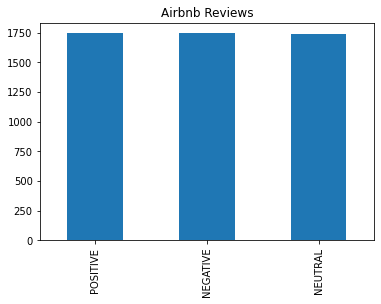

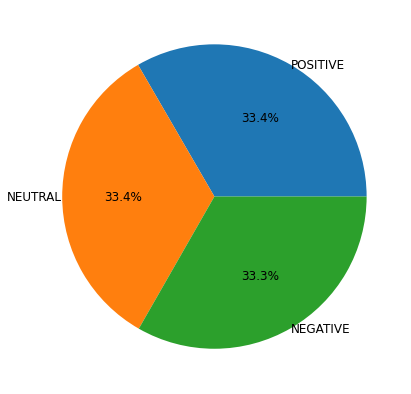

In [7]:
df.label.value_counts().plot(kind='bar',title="Airbnb Reviews")

plt.figure(figsize = (7,7))
plt.pie(df.label.value_counts(), labels = ['POSITIVE','NEUTRAL','NEGATIVE'], autopct = '%1.1f%%', labeldistance=1, textprops = {'fontsize':12})
# plt.title('Result Percentage', fontsize=15)
plt.show()

## <font color='RED'> Text Processing - Process Contractions, Remove Stopwords </font> 
- Make textual data noise-free as much as possible  

In [8]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# https://towardsdatascience.com/nlp-for-beginners-cleaning-preprocessing-text-data-ae8e306bef0f
# Cleaning & Preprocessing Text Data
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from contractions import CONTRACTION_MAP
from nltk.corpus import wordnet

start_time = time.time()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def text_nomalization(df,colname):
    # remove empty rows
    df=df.dropna()
    # remove number in the review sentences
    df.loc[:,(colname)] = df[colname].str.replace('\d+', '')
    # remove_punctuation
    df.loc[:,(colname)] = df[colname].str.replace('[^\w\s]', '') 
    df.loc[:,(colname)] = df[colname].str.replace(r'[^\x00-\x7F]+', '')
    df.loc[:,(colname)] = df[colname].str.lower()
    # remove duplicated comments/reviews
    df.drop_duplicates(subset=colname, keep = "first", inplace = True)
    return df

def remove_html(text):
    soup= BeautifulSoup(text,'lxml')
    html_free = soup.get_text()
    return html_free

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text


def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def remove_stopwords(text):
    words = [word for word in nltk.word_tokenize(text) if word not in stopwords.words('english')]    
    return words

def word_lemmatizer(text):
    lem_text = ([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in text])
#     clean_text = ' '.join(word for word in lem_text)
    return lem_text

def word_stemmer(text):
    stem_text = ([stemmer.stem(word) for word in text])
    #clean_text = ' '.join(word for word in stem_text)
    return stem_text

def join(token_text):
    sent = ' '.join(word for word in token_text)
    return sent

def text_processing(df,colname, do_stemmer=1):
    start_process = time.time()
    df = text_nomalization(df,colname)    
    print("+++++ text_nomalization duration--- %s seconds ---" % (time.time() - start_process))
    
    start_process = time.time()    
    df.loc[:,(colname)] = df[colname].apply(lambda x: remove_html(x))
    print("+++++ remove_html duration--- %s seconds ---" % (time.time() - start_process))
    
    start_process = time.time()    
    df.loc[:,(colname)] = df[colname].apply(lambda x: expand_contractions(x))
    print("+++++ expand_contractions duration--- %s seconds ---" % (time.time() - start_process))
    
#     start_process = time.time()    
#     df[colname] = df[colname].apply(lambda x: tokenizer.tokenize(x.lower()))
#     print("+++++ tokenizer duration--- %s seconds ---" % (time.time() - start_process))
    
    start_process = time.time()    
    df.loc[:,(colname)] = df[colname].apply(lambda x: remove_stopwords(x))
    print("+++++ remove_stopwords duration--- %s seconds ---" % (time.time() - start_process))
  
    start_process = time.time()    
    df.loc[:,(colname)] = df[colname].apply(lambda x: word_lemmatizer(x))
    print("+++++ word_lemmatizer duration--- %s seconds ---" % (time.time() - start_process))

    if (do_stemmer==1):
        start_process = time.time()    
        df.loc[:,(colname)] = df[colname].apply(lambda x: word_stemmer(x))
        print("+++++ word_stemmer duration--- %s seconds ---" % (time.time() - start_process))
    
    start_process = time.time()    
    df.loc[:,(colname)] = df[colname].apply(lambda x: join(x))
    print("+++++ join duration--- %s seconds ---" % (time.time() - start_process))
    
    return df

print('df.shape BEFORE TEXT PROCESSING: ',df.shape)
df['comments'] = df['comments_orig']
colname='comments'
df = text_processing(df,colname)

print("TEXT PROCESSING DURATION --- %s seconds ---" % (time.time() - start_time))
print('df.shape AFTER TEXT PROCESSING: ',df.shape)
df.head(10)

df.shape BEFORE TEXT PROCESSING:  (5236, 6)
+++++ text_nomalization duration--- 0.11072230339050293 seconds ---
+++++ remove_html duration--- 0.8087749481201172 seconds ---
+++++ expand_contractions duration--- 1.8939368724822998 seconds ---
+++++ remove_stopwords duration--- 52.35760855674744 seconds ---
+++++ word_lemmatizer duration--- 60.01642894744873 seconds ---
+++++ word_stemmer duration--- 1.8493406772613525 seconds ---
+++++ join duration--- 0.015957117080688477 seconds ---
TEXT PROCESSING DURATION --- 117.05576276779175 seconds ---
df.shape AFTER TEXT PROCESSING:  (4105, 6)


,listing_id,comments,label,city,lang,comments_orig
111312,30346862,wonder locat iman make check easi patioth best...,POSITIVE,vancouver,en,What a wonderful location! Iman made checking ...
79762,39151461,photoshop fake pictur,NEGATIVE,ottawa,en,photoshopped fake pictures ...
30348,17191132,tri tow car call airbnb heat issu somehow hop ...,NEGATIVE,ottawa,en,They tried to tow our car after we called Airb...
294208,29186162,heat bedroom enough,NEUTRAL,toronto,en,Heating in the bedroom is not enough
12139,1365638,host cancel reserv day arriv autom post,NEUTRAL,toronto,en,The host canceled this reservation 8 days befo...
365276,42073085,realli beauti place th floor realli comfi easi...,POSITIVE,toronto,en,It's a really beautiful place on the 35th floo...
194992,36795227,reserv fraud rutu send u messag hour arriv men...,NEGATIVE,montreal,en,The reservation was a fraud because Rutu send ...
352781,38295203,amaz place super clean snack ne refresh wait a...,POSITIVE,toronto,en,"Amazing place. Super clean , has snacks a ne ..."
20790,3812348,catherin welcom even get fresh muffin right oven,POSITIVE,vancouver,en,Catherine was so welcoming! We even got some f...
56130,10269711,great place stay long term everyth go smooth d...,POSITIVE,montreal,en,This is a great place to stay. I did long term...


In [9]:
for col in df.columns:
    print(col, df[col].isnull().sum())

listing_id 0
comments 0
label 0
city 0
lang 0
comments_orig 0


df.shape AFTER TEXT PROCESSING:  (4105, 6)


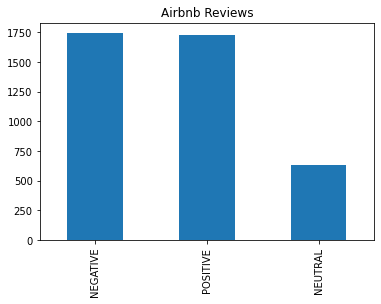

In [10]:
df.label.value_counts().plot(kind='bar',title="Airbnb Reviews")

print('df.shape AFTER TEXT PROCESSING: ',df.shape)

## <font color='RED'> EXPORT CLEAN DATA TO CSV FILE </font> 

In [11]:
if (is_select_full == 1):
    exported_file = sampling_folder + 'sample_reviews_FULL.csv'
else:
    exported_file = sampling_folder + 'sample_reviews.csv'
    
df.to_csv(exported_file, index = False)
df.head(3)

,listing_id,comments,label,city,lang,comments_orig
111312,30346862,wonder locat iman make check easi patioth best...,POSITIVE,vancouver,en,What a wonderful location! Iman made checking ...
79762,39151461,photoshop fake pictur,NEGATIVE,ottawa,en,photoshopped fake pictures ...
30348,17191132,tri tow car call airbnb heat issu somehow hop ...,NEGATIVE,ottawa,en,They tried to tow our car after we called Airb...
